## Hits - Charge Analysis

Working with an H5 file of WatChMal project, and with the objective to better understand the relationship between the charge of an event and its resulting number of hits with that charge, we relay on two important datasets: 

1. Dataset #1 - List of tuples with the id event and number of hits
2. Dataset #2 - List of charges corresponding to each event in Dataset #1

In [72]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import h5py

#### Function to read and get tuples of (event, hits)

In [73]:
def get_events_hits(path):
    # Open the H5 file
    with h5py.File(path, 'r') as f:
        # Get the 'event_ids' and 'event_hits_index' datasets
        event_ids = f['event_ids'][()]
        event_hits_index = f['event_hits_index'][()]

        # Create a list to store the tuples
        event_hit_counts = []

        # Get list of charges
        charges = f['energies'][()]

        # Iterate over each event
        for i in range(len(event_ids)):
            # Get the starting and ending indices for hits of the current event
            start_index = event_hits_index[i]
            end_index = event_hits_index[i+1] if i < len(event_ids) - 1 else len(f['hit_charge'])

            # Compute the number of hits for the current event
            hit_count = end_index - start_index

            # Create a tuple with the event index and the hit count, and append it to the list
            event_hit_counts.append((i, hit_count))
            
    return event_hit_counts, charges

#### Retrieve hits and charge from every particle

In [74]:
## DEFINE PATHS HERE:
# e particle path
e_path = "./data/IWCD_mPMT_Short_e-_E0to1000MeV_unif-pos-R400-y300cm_4pi-dir_3000evts_0.h5"
# muon particle path
m_path = "./data/IWCD_mPMT_Short_mu-_E0to1000MeV_unif-pos-R400-y300cm_4pi-dir_3000evts_0.h5"
# gamma particle path
g_path = "./data/IWCD_gamma.h5"
# pion particle path
p_path = "./data/IWCD_mPMT_Short_pi0_E0to1000MeV_unif-pos-R400-y300cm_4pi-dir_3000evts_0.h5"

# get e-particle events hits
event_hit_counts_e, charges_e = get_events_hits(e_path)
# get muon-particle events hits
event_hit_counts_m, charges_m = get_events_hits(m_path)
# get gamma-particle events hits
event_hit_counts_g, charges_g = get_events_hits(g_path)
# get pion-particle events hits
event_hit_counts_p, charges_p = get_events_hits(p_path)


### Scatter Plot per particle - Normalized to 1,300 charge and 4,600 hits for x, y axis

One way to visualize the relationship between the charge of an event and its resulting number of hits is to create a scatter plot, where the x-axis represents the charge and the y-axis represents the number of hits.

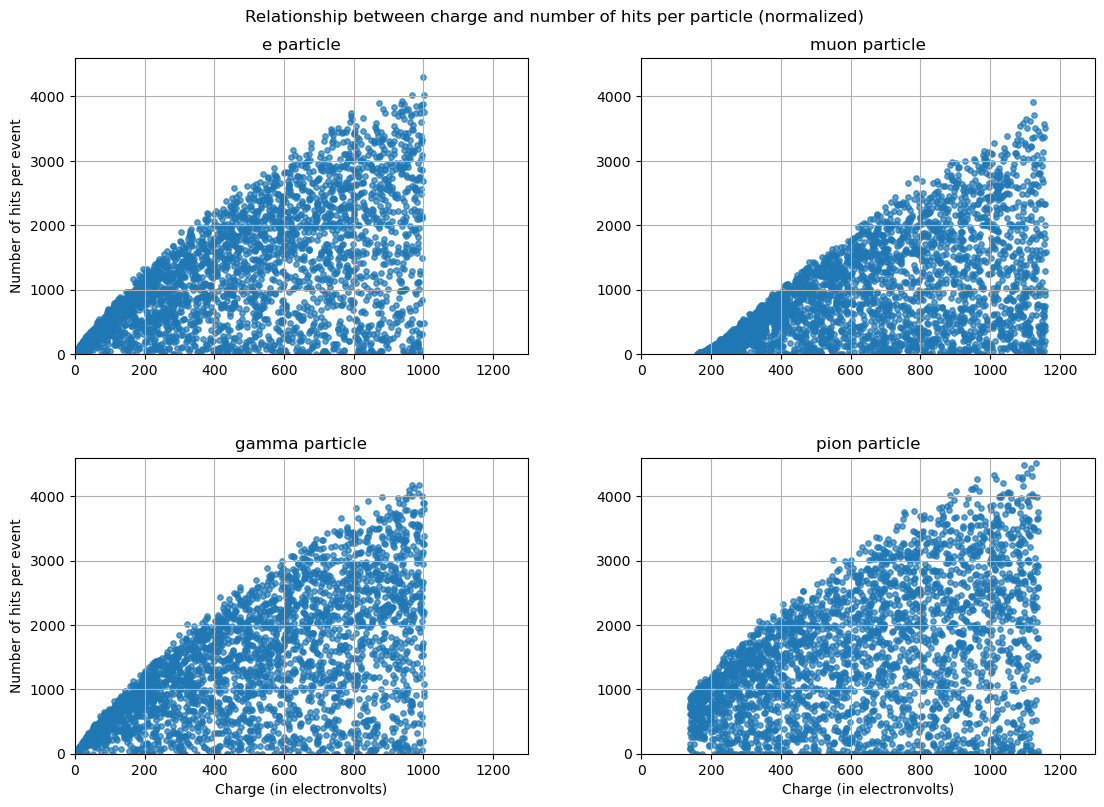

In [75]:
# Extract the hits and charges from the datasets
hits_e = [x[1] for x in event_hit_counts_e]
hits_m = [x[1] for x in event_hit_counts_m]
hits_g = [x[1] for x in event_hit_counts_g]
hits_p = [x[1] for x in event_hit_counts_p]


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

plt.suptitle('Relationship between charge and number of hits per particle (normalized)')

axs[0, 0].scatter(charges_e, hits_e, s=15, alpha=0.7)
axs[0, 0].set_title('e particle')
axs[0, 0].set_ylabel('Number of hits per event')
axs[0, 0].grid(True)
axs[0, 0].set_xlim([0, 1300])
axs[0, 0].set_ylim([0, 4600])

axs[0, 1].scatter(charges_m, hits_m, s=15, alpha=0.7)
axs[0, 1].set_title('muon particle')
axs[0, 1].grid(True)
axs[0, 1].set_xlim([0, 1300])
axs[0, 1].set_ylim([0, 4600])

axs[1, 0].scatter(charges_g, hits_g, s=15, alpha=0.7)
axs[1, 0].set_title('gamma particle')
axs[1, 0].set_xlabel('Charge (in electronvolts)')
axs[1, 0].set_ylabel('Number of hits per event')
axs[1, 0].grid(True)
axs[1, 0].set_xlim([0, 1300])
axs[1, 0].set_ylim([0, 4600])

axs[1, 1].scatter(charges_p, hits_p, s=15, alpha=0.7)
axs[1, 1].set_title('pion particle')
axs[1, 1].set_xlabel('Charge (in electronvolts)')
axs[1, 1].grid(True)
axs[1, 1].set_xlim([0, 1300])
axs[1, 1].set_ylim([0, 4600])

plt.subplots_adjust(top=0.92, bottom=0.05, left=0.10, right=0.95, hspace=0.35, wspace=0.25)
plt.show()


By looking at the scatter plot, we can visually inspect the relationship between the charge and the number of hits. There is a clear positive relationship between the two variables, as we can see a trend of points increasing from left to right.

#### 2D NORMALIZED Scatter Plot

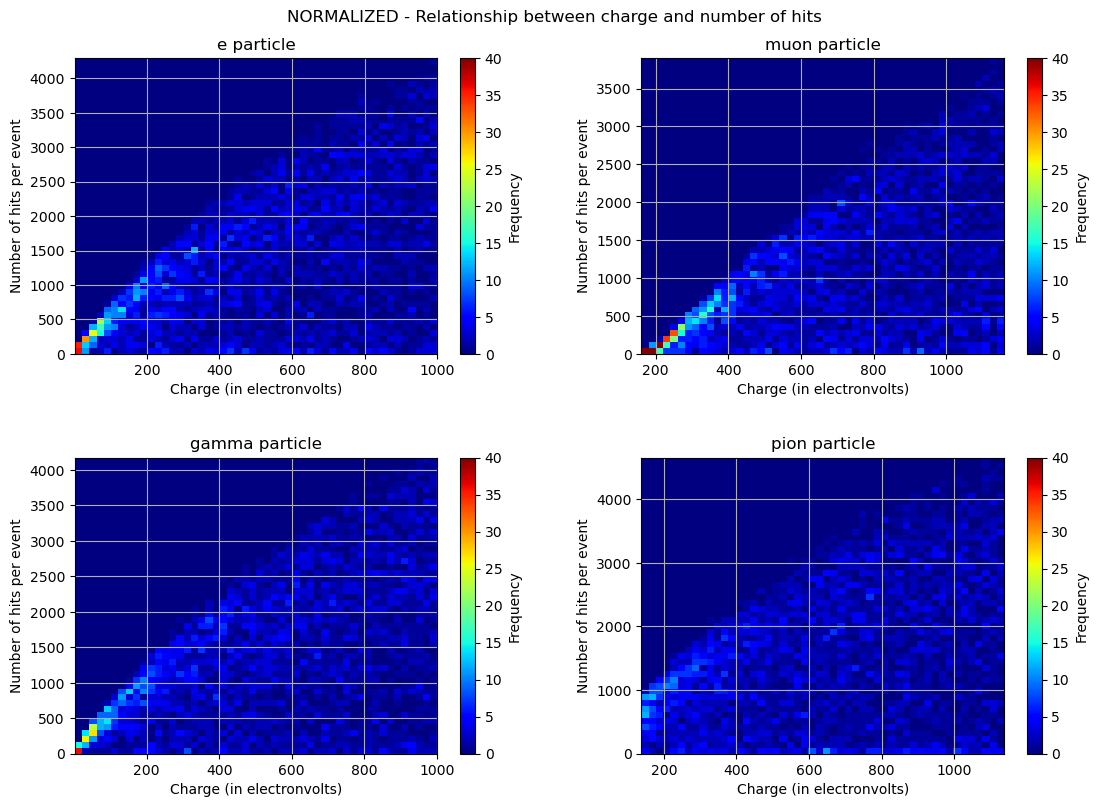

In [76]:
# reshape data to 1-dim array
hits_e = [x[1] for x in event_hit_counts_e]
charges_e = charges_e.ravel()

hits_m = [x[1] for x in event_hit_counts_m]
charges_m = charges_m.ravel()

hits_g = [x[1] for x in event_hit_counts_g]
charges_g = charges_g.ravel()

hits_p = [x[1] for x in event_hit_counts_p]
charges_p = charges_p.ravel()

# Create the 2D histogram NORMALIZED

# Create lists to iterate over
particle_types = ['e particle', 'muon particle', 'gamma particle', 'pion particle']
charge_data = [charges_e, charges_m, charges_g, charges_p]
hit_data = [hits_e, hits_m, hits_g, hits_p]


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

plt.suptitle('NORMALIZED - Relationship between charge and number of hits')

vmin, vmax = 0, 40

for i, (ptype, charges, hits) in enumerate(zip(particle_types, charge_data, hit_data)):
    hist = axs[i//2, i%2].hist2d(charges, hits, bins=(50, 50), cmap=plt.cm.jet, vmin=vmin, vmax=vmax)
    axs[i//2, i%2].set_title(ptype)
    axs[i//2, i%2].set_xlabel('Charge (in electronvolts)')
    axs[i//2, i%2].set_ylabel('Number of hits per event')
    axs[i//2, i%2].grid(True)

    cbar = fig.colorbar(hist[3], ax=axs[i//2, i%2])
    cbar.set_label('Frequency')

    cbar.mappable.set_clim(vmin, vmax)

plt.subplots_adjust(top=0.92, bottom=0.05, left=0.10, right=0.95, hspace=0.35, wspace=0.25)
plt.show()




#### 2D NOT NORMALIZED Scatter Plot

/var/folders/3g/dbkdsn912mq_rllq1ghmk4tc0000gn/T/ipykernel_13183/3131867717.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


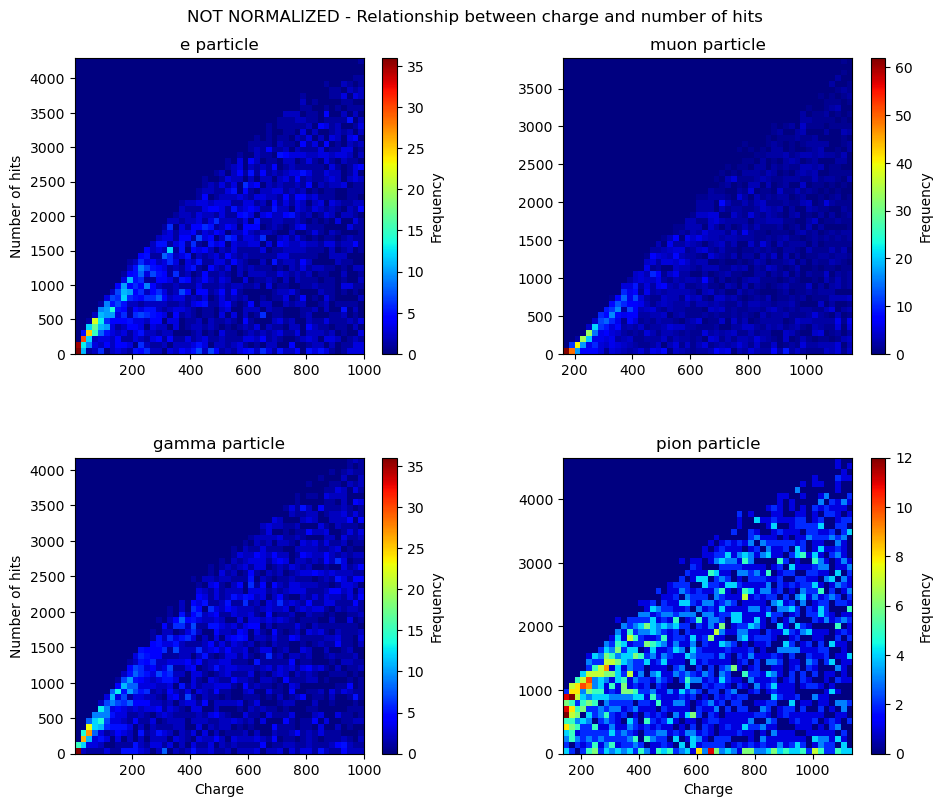

In [77]:
# NOT NORMALIZED
plt.figure(figsize=(10, 8))
plt.grid(True)

# Define the bins for the histograms
bins = 50

plt.suptitle('NOT NORMALIZED - Relationship between charge and number of hits')

# Create the scatter plot
plt.subplot(221)
plt.title('e particle')
im1 = plt.hist2d(charges_e, hits_e, bins=bins, cmap=plt.cm.jet)
plt.ylabel('Number of hits')
plt.colorbar(im1[3]).set_label('Frequency')

plt.subplot(222)
plt.title('muon particle')
im2 = plt.hist2d(charges_m, hits_m, bins=bins, cmap=plt.cm.jet)
plt.colorbar(im2[3]).set_label('Frequency')

plt.subplot(223)
plt.title('gamma particle')
im3 = plt.hist2d(charges_g, hits_g, bins=bins, cmap=plt.cm.jet)
plt.xlabel('Charge')
plt.ylabel('Number of hits')
plt.colorbar(im3[3]).set_label('Frequency')

plt.subplot(224)
plt.title('pion particle')
im4 = plt.hist2d(charges_p, hits_p, bins=bins, cmap=plt.cm.jet)
plt.xlabel('Charge')
plt.colorbar(im4[3]).set_label('Frequency')

plt.subplots_adjust(top=0.92, bottom=0.05, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.35)

plt.show()

To create another visualization to understand the relationship between the number of hits and charge, we use a 2D histogram, where the x-axis represents the charge, the y-axis represents the number of hits, and the color represents the frequency of events with a particular combination of charge and number of hits. 

#### Create list of arrays = [event_id, hits, charge] per particle

In [78]:
# Create a list of lists with the id event, number of hits, and charge of every event per particle
# e-particle
event_data_e = [(event_hit_counts_e[i][0], event_hit_counts_e[i][1], charges_e[i]) for i in range(len(event_hit_counts_e))]
# muon-particle
event_data_m = [(event_hit_counts_m[i][0], event_hit_counts_m[i][1], charges_m[i]) for i in range(len(event_hit_counts_m))]
# gamma-particle
event_data_g = [(event_hit_counts_g[i][0], event_hit_counts_g[i][1], charges_g[i]) for i in range(len(event_hit_counts_g))]
# pion-particle
event_data_p = [(event_hit_counts_p[i][0], event_hit_counts_p[i][1], charges_p[i]) for i in range(len(event_hit_counts_p))]

# Print the first few elements to verify the data is correct
print('Pion particle data events: ', event_data_p[:5])

# It follows the format: (event_id, number_hits, charge)

Pion particle data events:  [(0, 925, 382.3042), (1, 459, 238.91508), (2, 1122, 192.09808), (3, 824, 643.39307), (4, 2628, 627.0444)]


### Sort the data events in ascending based on the hits

In [79]:
# Sort the event_data list based on the number of hits in ascending order
# e-particle
sorted_hits_event_data_e = sorted(event_data_e, key=lambda x: x[1])
# muon-particle
sorted_hits_event_data_m = sorted(event_data_m, key=lambda x: x[1])
# gamma-particle
sorted_hits_event_data_g = sorted(event_data_g, key=lambda x: x[1])
# pion-particle
sorted_hits_event_data_p = sorted(event_data_p, key=lambda x: x[1])

### Filter the sorted data to events > 2,000 hits

In [80]:
# Filter the sorted event data list to only include events with more than 2000 hits

# Data threshold definition
hits_threshold = 2000

# e-particle
filtered_event_data_e = [x for x in sorted_hits_event_data_e if x[1] > hits_threshold]
# muon-particle
filtered_event_data_m = [x for x in sorted_hits_event_data_m if x[1] > hits_threshold]
# gamma-particle
filtered_event_data_g = [x for x in sorted_hits_event_data_g if x[1] > hits_threshold]
# pion-particle
filtered_event_data_p = [x for x in sorted_hits_event_data_p if x[1] > hits_threshold]

# Print the filtered event data list to verify the filtering
print(f'Filtered data for e-particle with more than {hits_threshold} hits:', filtered_event_data_e[:5])

Filtered data for e-particle with more than 2000 hits: [(979, 2001, 399.7022), (2707, 2002, 715.9153), (1528, 2003, 687.4672), (2758, 2003, 542.88513), (1260, 2004, 815.7617)]


#### NOT NORMALIZED Boxplot Analysis of events > 2,000 hits

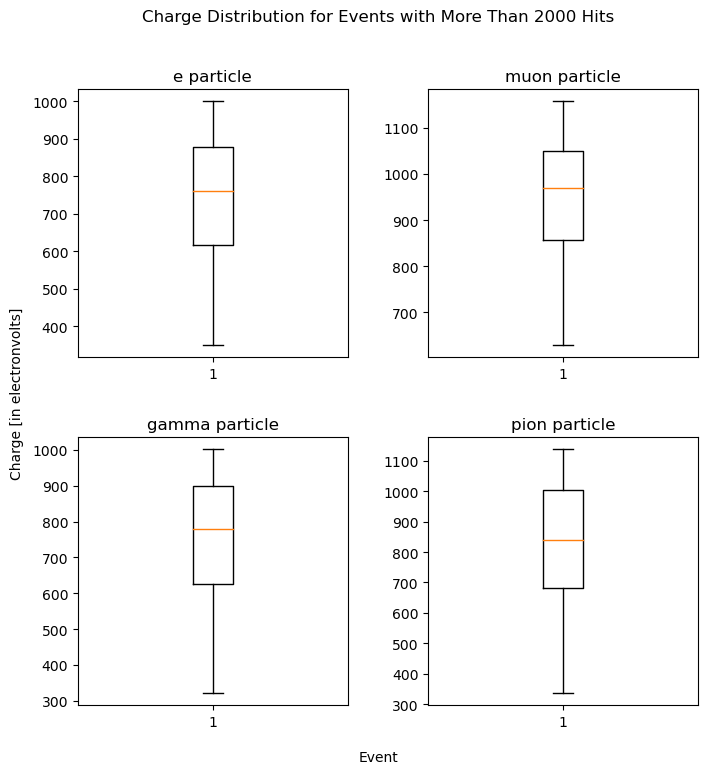

In [81]:
# Create a new figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Extract the charges from the filtered event data list for each particle
charges_filtered_e = [x[2] for x in filtered_event_data_e]
charges_filtered_m = [x[2] for x in filtered_event_data_m]
charges_filtered_g = [x[2] for x in filtered_event_data_g]
charges_filtered_p = [x[2] for x in filtered_event_data_p]

# Create a boxplot for each particle in a separate subplot
axs[0, 0].boxplot(charges_filtered_e)
axs[0, 0].set_title('e particle')

axs[0, 1].boxplot(charges_filtered_m)
axs[0, 1].set_title('muon particle')

axs[1, 0].boxplot(charges_filtered_g)
axs[1, 0].set_title('gamma particle')

axs[1, 1].boxplot(charges_filtered_p)
axs[1, 1].set_title('pion particle')

# Add axis labels and title to the overall figure
fig.suptitle('Charge Distribution for Events with More Than 2000 Hits')
fig.text(0.5, 0.04, 'Event', ha='center')
fig.text(0.04, 0.5, 'Charge [in electronvolts]', va='center', rotation='vertical')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Display the plot
plt.show()


#### NORMALIZED Boxplot Analysis of events > 2,000 hits

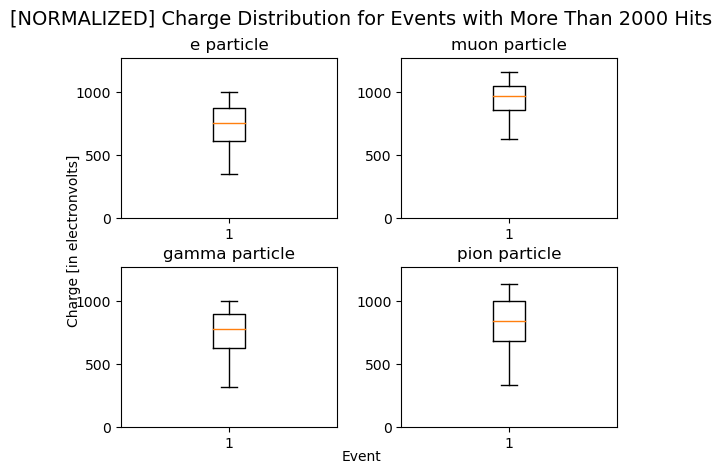

In [82]:
# Create a figure with four subplots
fig, axs = plt.subplots(nrows=2, ncols=2)

# Set the y-axis limits for all the subplots
ylim = (0, 1.1 * max([max(charges_filtered_e), max(charges_filtered_m), max(charges_filtered_g), max(charges_filtered_p)]))
for ax in axs.flatten():
    ax.set_ylim(ylim)

# Create the boxplots for the e-particle, muon-particle, gamma-particle, and pion-particle datasets
axs[0,0].boxplot(charges_filtered_e)
axs[0,0].set_title('e particle')

axs[0,1].boxplot(charges_filtered_m)
axs[0,1].set_title('muon particle')

axs[1,0].boxplot(charges_filtered_g)
axs[1,0].set_title('gamma particle')

axs[1,1].boxplot(charges_filtered_p)
axs[1,1].set_title('pion particle')

# Add axis labels and a main title
fig.suptitle('[NORMALIZED] Charge Distribution for Events with More Than 2000 Hits', fontsize=14)
fig.text(0.5, 0.04, 'Event', ha='center')
fig.text(0.04, 0.5, 'Charge [in electronvolts]', va='center', rotation='vertical')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Show the plot
plt.show()


#### NOT NORMALIZED 2D Scatter Plot for Events > 2,000 Hits

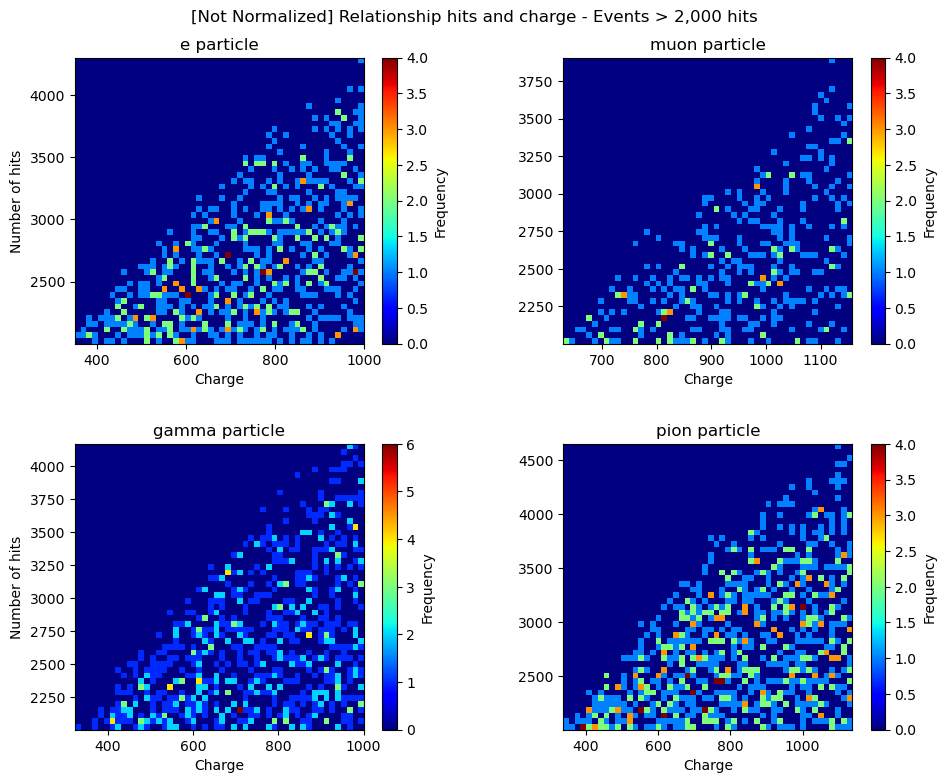

In [83]:
# Create the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Extract hits from filtered data
# e-particle
sorted_hits_e = [x[1] for x in filtered_event_data_e]
# muon-particle
sorted_hits_m = [x[1] for x in filtered_event_data_m]
# gamma-particle
sorted_hits_g = [x[1] for x in filtered_event_data_g]
# pion-particle
sorted_hits_p = [x[1] for x in filtered_event_data_p]

# Extract the charges from the filtered event data list
# e-particle
sorted_charges_e = [x[2] for x in filtered_event_data_e]
# muon-particle
sorted_charges_m = [x[2] for x in filtered_event_data_m]
# gamma-particle
sorted_charges_g = [x[2] for x in filtered_event_data_g]
# pion-particle
sorted_charges_p = [x[2] for x in filtered_event_data_p]

# Create the 2D histograms for each dataset
bins = 50
cmap = plt.cm.jet
# e-particle
im1 = axs[0, 0].hist2d(sorted_charges_e, sorted_hits_e, bins=bins, cmap=cmap)
axs[0, 0].set_title('e particle')
axs[0, 0].set_ylabel('Number of hits')
axs[0, 0].set_xlabel('Charge')
cbar1 = fig.colorbar(im1[3], ax=axs[0, 0])
cbar1.set_label('Frequency')

# muon-particle
im2 = axs[0, 1].hist2d(sorted_charges_m, sorted_hits_m, bins=bins, cmap=cmap)
axs[0, 1].set_title('muon particle')
axs[0, 1].set_xlabel('Charge')
cbar2 = fig.colorbar(im2[3], ax=axs[0, 1])
cbar2.set_label('Frequency')

# gamma-particle
im3 = axs[1, 0].hist2d(sorted_charges_g, sorted_hits_g, bins=bins, cmap=cmap)
axs[1, 0].set_title('gamma particle')
axs[1, 0].set_ylabel('Number of hits')
axs[1, 0].set_xlabel('Charge')
cbar3 = fig.colorbar(im3[3], ax=axs[1, 0])
cbar3.set_label('Frequency')

# pion-particle
im4 = axs[1, 1].hist2d(sorted_charges_p, sorted_hits_p, bins=bins, cmap=cmap)
axs[1, 1].set_title('pion particle')
axs[1, 1].set_xlabel('Charge')
cbar4 = fig.colorbar(im4[3], ax=axs[1, 1])
cbar4.set_label('Frequency')

# Adjust spacing and display the plot
plt.suptitle('[Not Normalized] Relationship hits and charge - Events > 2,000 hits')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.35)
plt.show()

#### NORMALIZED 2D Scatter Plot for Events > 2,000 Hits

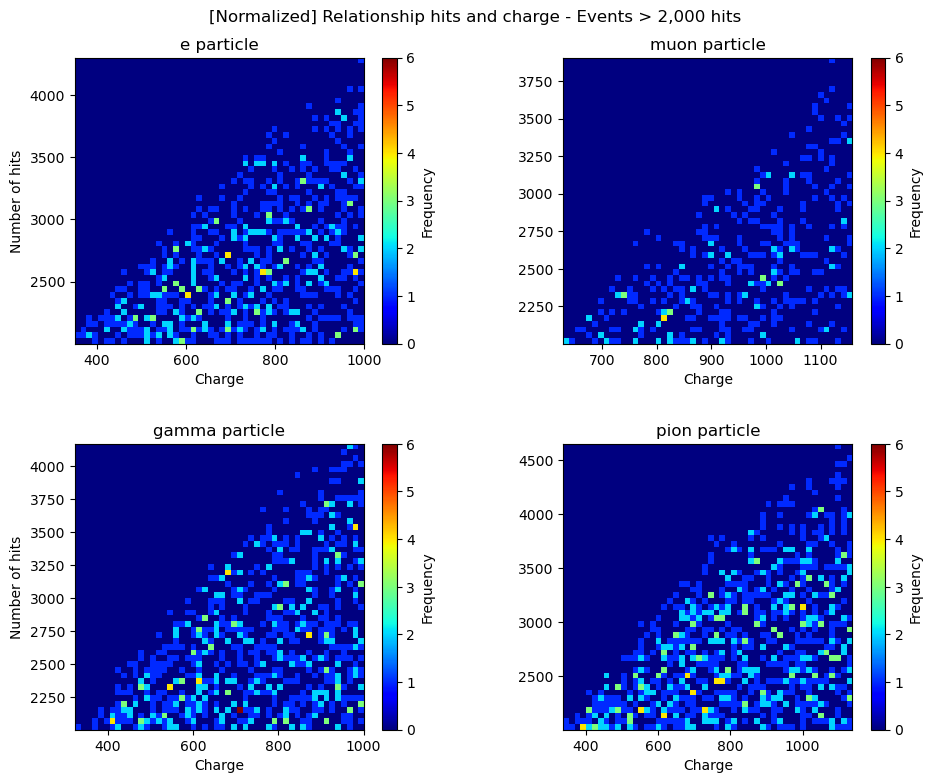

In [84]:
# Create the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Extract hits from filtered data
# e-particle
sorted_hits_e = [x[1] for x in filtered_event_data_e]
# muon-particle
sorted_hits_m = [x[1] for x in filtered_event_data_m]
# gamma-particle
sorted_hits_g = [x[1] for x in filtered_event_data_g]
# pion-particle
sorted_hits_p = [x[1] for x in filtered_event_data_p]

# Extract the charges from the filtered event data list
# e-particle
sorted_charges_e = [x[2] for x in filtered_event_data_e]
# muon-particle
sorted_charges_m = [x[2] for x in filtered_event_data_m]
# gamma-particle
sorted_charges_g = [x[2] for x in filtered_event_data_g]
# pion-particle
sorted_charges_p = [x[2] for x in filtered_event_data_p]

# Create the 2D histograms for each dataset
bins = 50
cmap = plt.cm.jet
norm = plt.Normalize(vmin=0, vmax=6)
# e-particle
im1 = axs[0, 0].hist2d(sorted_charges_e, sorted_hits_e, bins=bins, cmap=cmap, norm=norm)
axs[0, 0].set_title('e particle')
axs[0, 0].set_ylabel('Number of hits')
axs[0, 0].set_xlabel('Charge')
cbar1 = fig.colorbar(im1[3], ax=axs[0, 0])
cbar1.set_label('Frequency')

# muon-particle
im2 = axs[0, 1].hist2d(sorted_charges_m, sorted_hits_m, bins=bins, cmap=cmap, norm=norm)
axs[0, 1].set_title('muon particle')
axs[0, 1].set_xlabel('Charge')
cbar2 = fig.colorbar(im2[3], ax=axs[0, 1])
cbar2.set_label('Frequency')

# gamma-particle
im3 = axs[1, 0].hist2d(sorted_charges_g, sorted_hits_g, bins=bins, cmap=cmap, norm=norm)
axs[1, 0].set_title('gamma particle')
axs[1, 0].set_ylabel('Number of hits')
axs[1, 0].set_xlabel('Charge')
cbar3 = fig.colorbar(im3[3], ax=axs[1, 0])
cbar3.set_label('Frequency')

# pion-particle
im4 = axs[1, 1].hist2d(sorted_charges_p, sorted_hits_p, bins=bins, cmap=cmap, norm=norm)
axs[1, 1].set_title('pion particle')
axs[1, 1].set_xlabel('Charge')
cbar4 = fig.colorbar(im4[3], ax=axs[1, 1])
cbar4.set_label('Frequency')

# Adjust spacing and display the plot
plt.suptitle('[Normalized] Relationship hits and charge - Events > 2,000 hits')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.35)
plt.show()
